# Implementing K-means Clustering

<b> Using NumPy or the math package and the Euclidean distance formula, write a function that calculates the distance between two coordinates </b>

In [1]:
# import packages
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import math
np.random.seed(0)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# create a distance function distance
def dist(a, b):
    return math.sqrt(math.pow(a[0]-b[0], 2) + math.pow(a[1]-b[1], 2))

In [3]:
# calculate a distance
a = [1, 1]
b = [4, 5]
dist(a, b)

5.0

In [4]:
# load data
seeds = pd.read_csv('datasets/Seed_Data.csv')
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [5]:
X = seeds.drop(columns=['target'])
X.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [6]:
y = seeds['target'].values

<b> Write a k-means function that takes in a dataset and the number of clusters (K) and returns the final cluster centroids, as well as the data points that make up that cluster's membership </b>

In [7]:
def k_means(X, K):
    centroids_history = []
    labels_history = []
    
    rand_index = np.random.choice(X.shape[0], K) # initialize centroids randomly
    centroids = X[rand_index]
    centroids_history.append(centroids)
    
    while True:
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
        
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

In [8]:
# convert DataFrame to numpy matrix
X_mat = X.values

<b> See whether your k-means algorithm can group the different wheat species into their proper groups just based on plant characteristics </b>

In [9]:
centroids, labels, centroids_history, labels_history = k_means(X_mat, 3)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1
 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


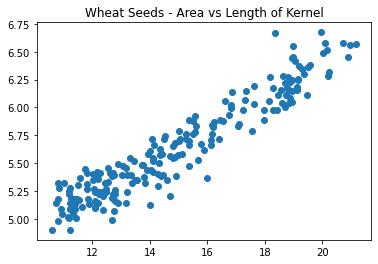

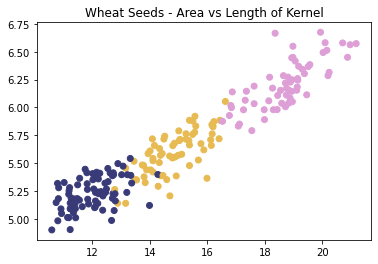

In [10]:
# See how well our implementation of K-Means did

plt.scatter(X['A'], X['LK'])
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()

plt.scatter(X['A'], X['LK'], c=labels, cmap='tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()

<b> Calculate the silhouette score using the scikit-learn implementation </b>

In [11]:
silhouette_score(X[['A','LK']], labels)

0.5875704550892767